In [11]:
import pandas as pd

# load the training dataset
data = pd.read_csv('train_BRCpofr.csv')
data.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [12]:
data.columns

Index(['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

<AxesSubplot:xlabel='claim_amount', ylabel='Count'>

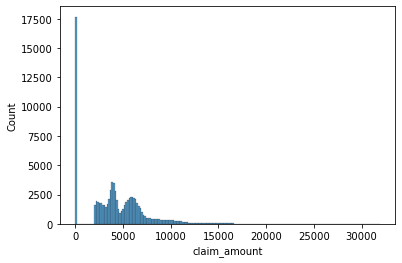

In [120]:
sns.histplot(data=data['claim_amount'])

<AxesSubplot:>

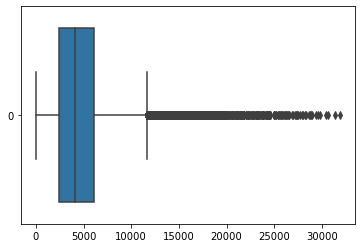

In [119]:
sns.boxplot(data=data['claim_amount'],orient='h')

<AxesSubplot:xlabel='claim_amount', ylabel='Count'>

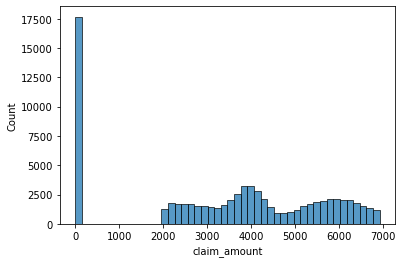

In [102]:
x = data['claim_amount']
x = x[x.between(x.quantile(.15), x.quantile(.85))]
sns.histplot(x)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='claim_amount'>

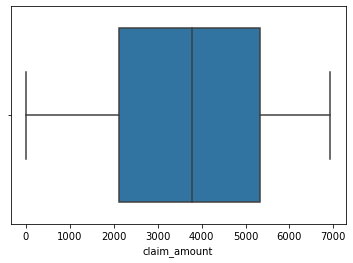

In [104]:
sns.boxplot(x)

In [103]:
len(x)

75983

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='claim_amount'>

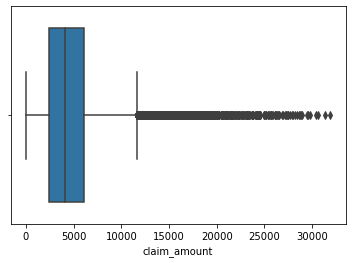

In [101]:
sns.boxplot(data['claim_amount'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cltv'>

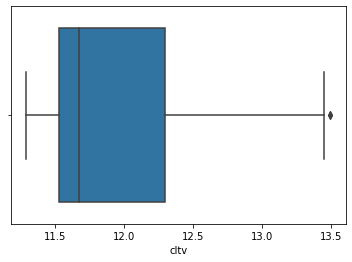

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.boxplot(np.log(data[data['cltv']>80000]['cltv']))

In [89]:
len(data[data['cltv']>80000]['cltv'])

31618

In [46]:
from scipy import stats
IQR = stats.iqr(data['cltv'], interpolation = 'midpoint',)
IQR

50604.0

<AxesSubplot:xlabel='cltv', ylabel='Count'>

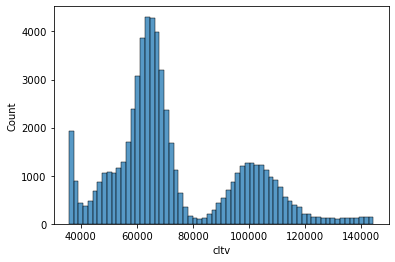

In [85]:
x = data['cltv']
x = x[x.between(x.quantile(.15), x.quantile(.85))]
sns.histplot(x)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cltv'>

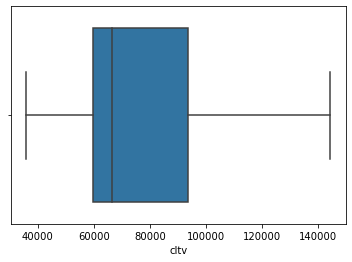

In [86]:
sns.boxplot(x)

In [125]:
xy_claima = data[data['claim_amount'].between(data['claim_amount'].quantile(.15), data['claim_amount'].quantile(.85))]
xy_cltv = data[data['cltv'].between(data['cltv'].quantile(.05), data['cltv'].quantile(.85))]

In [126]:
len(xy_cltv)

62585

In [127]:
xy

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772


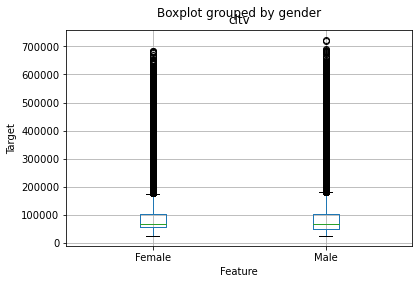

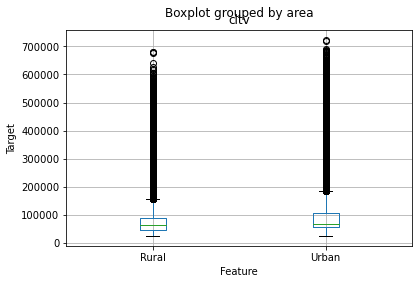

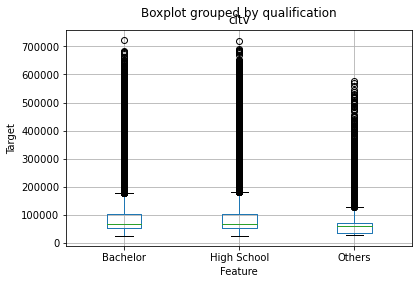

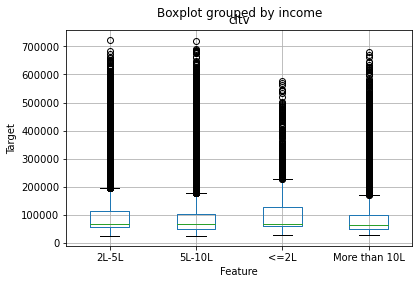

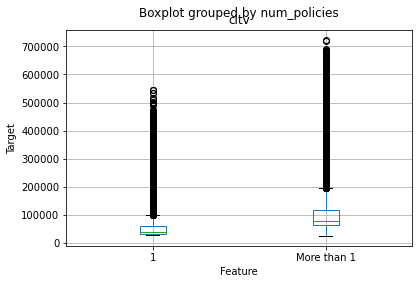

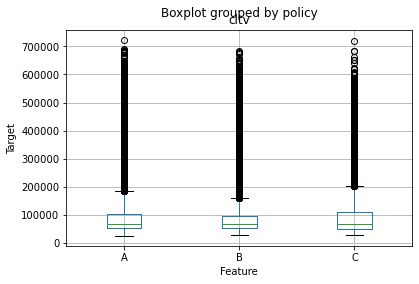

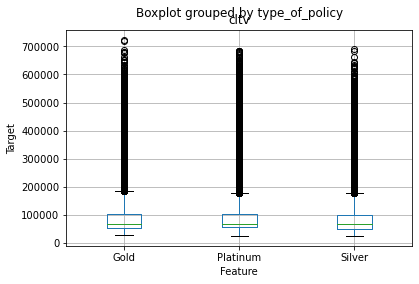

In [124]:
for col in data.columns:
    if data[col].dtype == 'object':
#         sns.boxplot(data=data[col],order=data['cltv'])
        data.boxplot(column='cltv', by=col)

        # add labels to the axes
        plt.xlabel("Feature")
        plt.ylabel("Target")

        # display the plot
        plt.show()
#         plt.show()

In [108]:
len(x)/len(data['cltv'])*100

84.99977626633256

In [6]:
# Split the data into features and target
import numpy as np
X = xy_cltv.drop(['id','cltv'], axis=1)
y = xy_cltv['cltv']

from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'xy_cltv' is not defined

In [7]:
sns.histplot(xy['cltv'])

NameError: name 'sns' is not defined

In [8]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5,7,8]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

# Get predictions
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('cltv Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

NameError: name 'X_train' is not defined

In [9]:
# Define preprocessing for numeric columns (scale them)
numeric_features = [6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5,7,8]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor(n_estimators=150,learning_rate=0.06))])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

# Get predictions
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('cltv Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

NameError: name 'X_train' is not defined

In [10]:
import pandas as pd
# train = pd.read_csv('train.csv')
test  = pd.read_csv("test_koRSKBP.csv")
predictions = model.predict(test.drop(['id'],axis=1))
# #taking the mean of cltv from the training set
# test['cltv']=train['cltv'].mean()
test_id=test['id']
df = pd.DataFrame({'id':np.array(test_id),'cltv':predictions}, columns = ['id','cltv'])
#creating the sample submission file
sample_submission = df[['id','cltv']]
sample_submission.to_csv("sample_submission_final_outlier3 removel.csv",index=False)

NameError: name 'model' is not defined

In [5]:
# Define preprocessing for numeric columns (scale them)
numeric_features = [6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5,7,8]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor(n_estimators=150,learning_rate=0.05))])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

# Get predictions
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('cltv Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

NameError: name 'Pipeline' is not defined

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5, 7, 8])])),
                ('regressor',
                 GradientBoostingRegressor(learning_rate=0.05,
                                           n_estimators=150))])
MSE: 6367994056.255083
RMSE: 79799.71213140486
R2: 0.15023151481718378


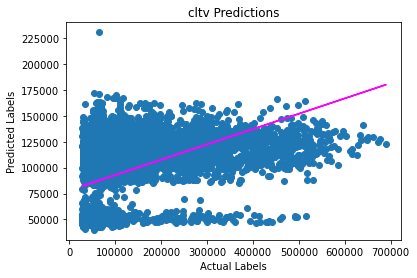

In [112]:
# Define preprocessing for numeric columns (scale them)
numeric_features = [6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5,7,8]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor(n_estimators=150,learning_rate=0.05))])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

# Get predictions
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('cltv Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5, 7, 8])])),
                ('regressor',
                 GradientBoostingRegressor(learning_rate=0.07,
                                           n_estimators=120))])
MSE: 6728962650.898197
RMSE: 82030.25448514833
R2: 0.15907621384741688


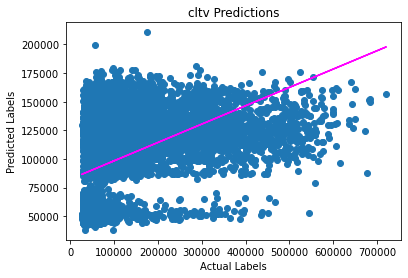

In [42]:
# Define preprocessing for numeric columns (scale them)
numeric_features = [6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5,7,8]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor(n_estimators=120,learning_rate=0.07))])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

# Get predictions
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('cltv Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [2]:
import pandas as pd

# load the training dataset
data = pd.read_csv('train_BRCpofr.csv')
data.head()


# Split the data into features and target
import numpy as np
X = data.drop(['id','cltv'], axis=1)
y = data['cltv']

#from sklearn.model_selection import train_test_split
## Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Print the mean and standard deviation of the scores
print("Mean: ", np.mean(scores))
print("Standard deviation: ", np.std(scores))

# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5,7,8]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])

# Import KFold
from sklearn.model_selection import KFold, cross_val_score

# Define the number of folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(pipeline, X, y, cv=kf)
# fit the pipeline to train a linear regression model on the training set
# model = pipeline.fit(X_train, (y_train))
print (scores)

# Get predictions
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('cltv Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()



import pandas as pd
# train = pd.read_csv('train.csv')
test  = pd.read_csv("test_koRSKBP.csv")
predictions = model.predict(test.drop(['id'],axis=1))
# #taking the mean of cltv from the training set
# test['cltv']=train['cltv'].mean()
test_id=test['id']
df = pd.DataFrame({'id':np.array(test_id),'cltv':predictions}, columns = ['id','cltv'])
#creating the sample submission file
sample_submission = df[['id','cltv']]
sample_submission.to_csv("sample_submission_final_Kforld_1.csv",index=False)



NameError: name 'scores' is not defined

In [11]:
import pandas as pd

# load the training dataset
data = pd.read_csv('train_BRCpofr.csv')
data.head()


# Split the data into features and target
import numpy as np
X = data.drop(['id','cltv'], axis=1)
y = data['cltv']

from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [12]:
X_train

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
22085,Male,Urban,Others,More than 10L,1,6,2071,More than 1,A,Gold
19413,Male,Urban,Others,5L-10L,1,3,7275,1,B,Platinum
30309,Female,Urban,High School,<=2L,1,6,4716,1,A,Platinum
333,Female,Urban,High School,5L-10L,0,6,0,1,A,Platinum
60407,Female,Urban,Bachelor,5L-10L,1,5,0,More than 1,B,Silver
...,...,...,...,...,...,...,...,...,...,...
6265,Male,Urban,High School,5L-10L,1,7,3863,1,B,Platinum
54886,Male,Rural,Bachelor,5L-10L,1,5,2248,1,A,Silver
76820,Female,Urban,Bachelor,More than 10L,0,7,6791,More than 1,A,Platinum
860,Male,Urban,Others,More than 10L,0,0,5876,1,B,Gold


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5, 7, 8,
                                                   9])])),
                ('regressor', GradientBoostingRegressor())])
MSE: 6729242466.216823
RMSE: 82031.96002910587
R2: 0.15904124510567008


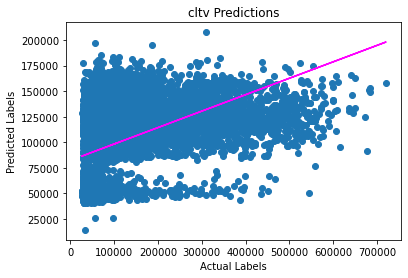

In [14]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5,7,8,9]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

# Get predictions
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('cltv Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()



import pandas as pd
# train = pd.read_csv('train.csv')
test  = pd.read_csv("test_koRSKBP.csv")
predictions = model.predict(test.drop(['id'],axis=1))
# #taking the mean of cltv from the training set
# test['cltv']=train['cltv'].mean()
test_id=test['id']
df = pd.DataFrame({'id':np.array(test_id),'cltv':predictions}, columns = ['id','cltv'])
#creating the sample submission file
sample_submission = df[['id','cltv']]
sample_submission.to_csv("sample_submission_final_9.csv",index=False)

